In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt

T = 1500
A0 = 10000
X0 = 5000
Y0 = 3000
Z0 = 1000

B = {'A':0.8,'X':0.6,'Y':0.5,'Z':0.5}
D = {'A':0.1,'X':0.4,'Y':0.35,'Z':0.4}
e = {'A':0.5,'X':0.6,'Y':0.4,'Z':0.2}
m = {'A':0.75,'X':0.6,'Y':0.5,'Z':0.3}

A = np.zeros(T); X = np.zeros(T); Y = np.zeros(T); Z = np.zeros(T)
A[0] = A0; X[0] = X0; Y[0] = Y0; Z[0] = Z0
dt = 0.05
class Simulation:
    global T,A0,X0,Y0,Z0,B,D,e,m,A,X,Y,Z,dt
    def __init__(self):
        pass

    def prob_rain(self,x):
        sigma = 30
        mu = 180
        p = 50*1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (x - mu)**2 / (2 * sigma**2))
        if p < 0.15:
            p = p + random.uniform(0,0.3)
            if p > 0.5:
                p = p - 0.1*p
        if p > 0.55:
            p = p - 0.1*p
        return p

    def alpha(self,i,s):
        global X,Y,Z
        if s == 'X':
            if A[i]==0:
                alpha = -10
                return alpha
            else:
                alpha = X[i]/A[i]
        elif s == 'Y':
            if X[i] == 0:
                alpha = -10
                return alpha
            else: 
                alpha = Y[i]/X[i]
        elif s == 'Z':
            if Y[i] == 0:
                alpha = -10
                return alpha
            else:
                alpha = Z[i]/Y[i]
        else:
            return 0
            
        if alpha > 1.5:
            alpha = -10
        elif 0.8<alpha<1.5:
            alpha = 0
        elif alpha < 0.8:
            alpha = 5
            
        return alpha

    def eat(self,i,s):
        if s == 'A':
            eat = e[s] + Simulation.prob_rain(self,i)
        else:
            eat = e[s] - Simulation.prob_rain(self,i) + Simulation.alpha(self,i,s)
        return eat

    def mate(self,i,s):
        mate = m[s] + Simulation.prob_rain(self,i) 
        return mate

    def beta(self,i,s):
        beta = Simulation.eat(self,i,s) + Simulation.mate(self,i,s) + B[s] - D[s]
        
        return beta

    def run(self):
        for i in range(T-1):
            bA = Simulation.beta(self,i,'A')
            bX = Simulation.beta(self,i,'X')
            bY = Simulation.beta(self,i,'Y')
            bZ = Simulation.beta(self,i,'Z')

            A[i+1] = A[i] - dt*bX*X[i]
            X[i+1] = X[i] + dt*(bX*X[i] - bY*Y[i])
            Y[i+1] = Y[i] + dt*(bX*X[i] + bY*Y[i] - bZ*Z[i])
            Z[i+1] = Z[i] + dt*(bY*Y[i] + bZ*Z[i])

            if A[i+1] < 0:
                A[i+1] = 0
            if X[i+1] < 0:
                X[i+1] = 0
            if Y[i+1] < 0:
                Y[i+1] = 0
            if Z[i+1] < 0:
                Z[i+1] = 0
        return A, X, Y, Z
        
model = Simulation()
A,X,Y,Z = model.run()

In [3]:
data = np.array(X[:1200]).reshape(1200,1)

In [4]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
data = sc.fit_transform(data)

In [34]:
X_train = []
y_train = []
for i in range(60, 1200):
    X_train.append(data[i-60:i, 0])
    y_train.append(data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [40]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [41]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


/home/aziz/miniconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/home/aziz/miniconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/home/aziz/miniconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_

Epoch 1/100
1140/1140 [==============================] - 19s 17ms/step - loss: 0.0623
Epoch 2/100
1140/1140 [==============================] - 18s 16ms/step - loss: 0.0453
Epoch 3/100
1140/1140 [==============================] - 18s 16ms/step - loss: 0.0458
Epoch 4/100
1140/1140 [==============================] - 18s 16ms/step - loss: 0.0448
Epoch 5/100
1140/1140 [==============================] - 17s 15ms/step - loss: 0.0441
Epoch 6/100
1140/1140 [==============================] - 18s 15ms/step - loss: 0.0449
Epoch 7/100
1140/1140 [==============================] - 18s 16ms/step - loss: 0.0444
Epoch 8/100
1140/1140 [==============================] - 17s 15ms/step - loss: 0.0447
Epoch 9/100
1140/1140 [==============================] - 17s 15ms/step - loss: 0.0435
Epoch 10/100
1140/1140 [==============================] - 17s 15ms/step - loss: 0.0451
Epoch 11/100
1140/1140 [==============================] - 18s 15ms/step - loss: 0.0443
Epoch 12/100
1140/1140 [============================

In [42]:
regressor.save('my_model.h5')

In [1]:
#from keras.models import load_model

#regressor = load_model('my_model.h5')

Using Theano backend.
/home/aziz/miniconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/home/aziz/miniconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/home/aziz/miniconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserW

In [5]:
testData = np.array(X[1200:]).reshape(300,1)
inputs = sc.transform(testData)
X_test = []
for i in range(60, 300):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
prediction = regressor.predict(X_test)
prediction = sc.inverse_transform(prediction)


/home/aziz/miniconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/home/aziz/miniconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/home/aziz/miniconda3/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_

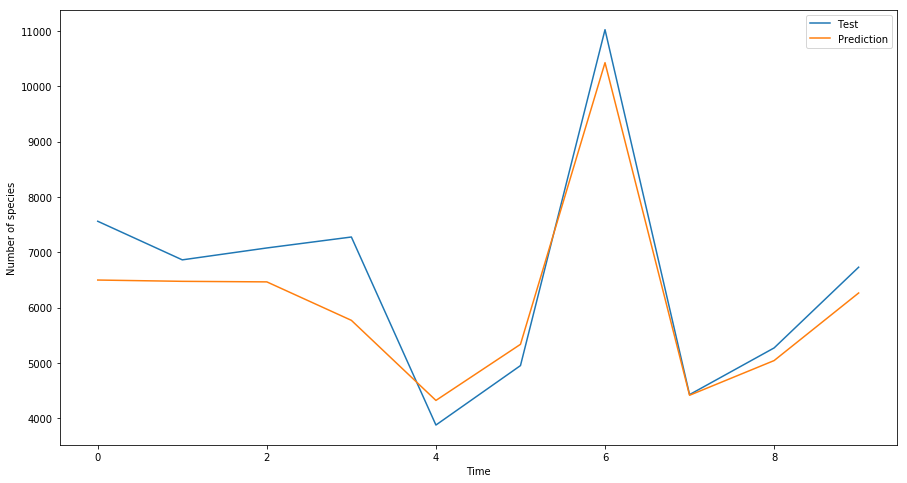

In [16]:
t = np.arange(len(prediction))
fig = plt.figure(figsize=(15,8))
plt.plot(t[:10],testData[1:11],label='Test')
plt.plot(t[:10],prediction[:10],label='Prediction')
plt.xlabel('Time')
plt.ylabel('Number of species')
plt.legend()

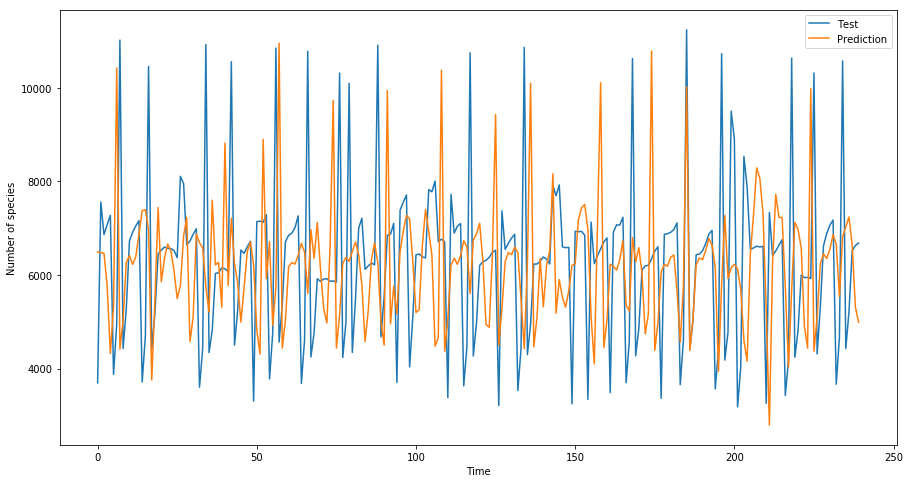

In [22]:
t = np.arange(len(prediction))
fig = plt.figure(figsize=(15,8))
plt.plot(t,testData[:len(prediction)],label='Test')
plt.plot(t,prediction,label='Prediction')
plt.xlabel('Time')
plt.ylabel('Number of species')
plt.legend()